<a href="https://colab.research.google.com/github/adithyarganesh/CSC555_Youtube_SNA/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#@title SOCIAL NETWORK ANALYSIS FOR YOUTUBE
#@markdown Authors: Adithya Raghu Ganesh, Meghana Ravindra Vasist

In [30]:
!pip install networkx
!pip install matplotlib
!pip install pandas

In [31]:
#@title Adding shortcut to drive
#@markdown https://drive.google.com/drive/folders/1I7gQ4S7FVWc-TJ_IInoyWFh8o38ZzvVr?usp=sharing


#@markdown Navigate to the above link and add the folder as a shortcut to drive so that the dataset can be accessed easily while running the code blocks

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import mean, median, mode

In [34]:
# Constructing the Youtube Network Graph
data = pd.read_csv("/content/gdrive/My Drive/SC/youtube_network.csv")
G = nx.Graph()
G.add_nodes_from(list(data["FromNodeId"] < 663522))
for i,j in data.iterrows():
  if j["FromNodeId"] < 663522 and j["ToNodeId"] < 663522:
    G.add_edge(j["FromNodeId"], j["ToNodeId"])

In [35]:
# Hypothesis 1

# Calculating influence of nodes
z = nx.pagerank(G, alpha = 0.85, max_iter = 6)

f =  open("/content/gdrive/My Drive/SC/youtube_community.txt", "r")
lis = [] # contains the average pagerank
t = [] # contains the length of community

# communities = {node: [communities the node is present in]}
communities = defaultdict(list)

# community_social_analysis = {community number: [all nodes in the community]}
community_social_analysis = defaultdict(list)
c = 0

# Constructing the two dictionaries
for i in f:
    pr = 0
    c += 1
    temp = i.replace("\n", "").split(",")
    for j in temp:
        communities[int(j)].append(c)
        community_social_analysis[c].append(int(j))
        pr += z[int(j)]
    lis.append(pr)
    t.append(len(temp))
a, b = zip(*sorted(zip(t, lis)))

# dict = {length of community: [average pageranks of all the communities of that length]}
dict = defaultdict(list)
for i,j in zip(a,b):
    dict[i].append(j)

# Calculating the median of all the pageranks of communities of the same length
temp_key, temp_val = [], []
for key, value in dict.items():
  temp_key.append(key)
  temp_val.append(median(value))

Text(0, 0.5, 'Average Page Rank Value')

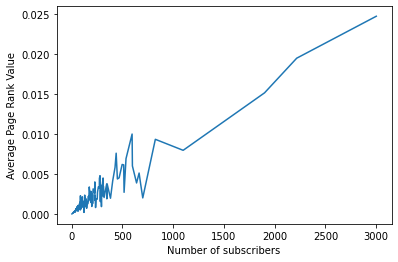

In [36]:
# Plotting average pagerank vs number of subscribers 
plt.plot(temp_key, temp_val)
plt.xlabel("Number of subscribers")
plt.ylabel("Average Page Rank Value")

In [37]:
# Converting data into required format
c = 0
m = []
for s,x in community_social_analysis.items():
  m.append((len(x), s))
  
comms = []
for i,j in sorted(m)[::-1]:
  comms.append(j)

sets = []
for i in [community_social_analysis[x] for x in comms]:
  sets.extend(i)

Hypothesis =  1 17732 34943


Text(0, 0.5, 'Number of Nodes')

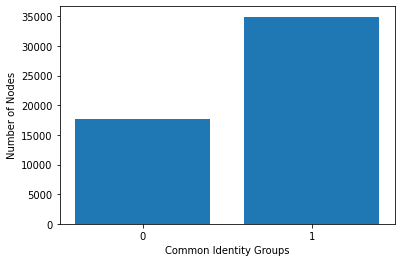

In [38]:
# Hypothesis 2
overall_majority = [] # Common identity for the overall network
overall_edges = []

# For each node check if its neighbors are in at least one of its communities
for node in list(G.nodes):
  neighbors = list(G.neighbors(node))
  node_community = communities[node]
  individual_majority = [] # 0 if node not in any community, else 1
  if node_community:
    edges = []
    for neighbor in neighbors:
      n_community = communities[neighbor]
      if n_community:
        common_communities = set(node_community).intersection(set(n_community))
        if common_communities:
          individual_majority.append(1)
        else:
          individual_majority.append(0)
        edges.append(len(common_communities))
    try:
      overall_majority.append(mode(individual_majority))
      temp = 0 if max(sum(edges), edges.count(0)) == edges.count(0) else sum(edges)
      overall_edges.append(temp if mode(individual_majority) == 1 else 0)
    except Exception:
      overall_majority.append(1)
      overall_edges.append(sum(edges))

# Checking the majority of the overall network
if overall_majority:
  print("Hypothesis = ", mode(overall_majority), overall_majority.count(0), overall_majority.count(1))

# Plotting number of nodes vs common identity groups
plt.bar(['0','1'],[overall_majority.count(0), overall_majority.count(1)])
plt.xlabel("Common Identity Groups")
plt.ylabel("Number of Nodes")

As it can be seen, there are about 19843 nodes with strong bonds, 15100 with weak bonds and about 17732 with no common bonds


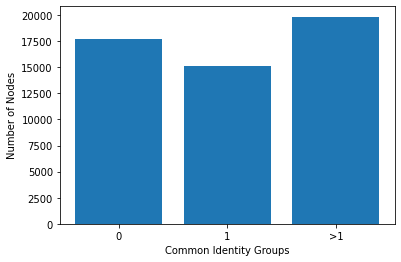

In [39]:
# Plot including strong bond or not
plt.bar(['0','1', '>1'],[overall_majority.count(0), overall_edges.count(1), len(overall_majority) - overall_majority.count(0) - overall_edges.count(1)])
plt.xlabel("Common Identity Groups")
plt.ylabel("Number of Nodes")
print(f"As it can be seen, there are about {len(overall_majority) - overall_majority.count(0) - overall_edges.count(1)} nodes with strong bonds, {overall_edges.count(1)} with weak bonds and about {overall_edges.count(0)} with no common bonds" )

In [40]:
# We also notice that on an average, if there is a common bond between two individuals, there is a likelihood that they have about 8 common communities (identities) between them
print(f"We also notice that on an average, if there is a common bond between two individuals, there is a likelihood that they have about {sum(overall_edges)/overall_majority.count(1)} common communities (identities) between them.")

We also notice that on an average, if there is a common bond between two individuals, there is a likelihood that they have about 8.480840225510116 common communities (identities) between them.


In [41]:
# Calculating degree of each node
# maps = {degree: number of nodes of that degree}
maps = defaultdict(int)
for i, j in list(G.degree())[2:]:
  maps[j] += 1

In [42]:
# Sorting maps based on the degree to plot the graph
temp = sorted(list(maps.items()))
a,b = [], []
for x, y in temp:
  a.append(x)
  b.append(y)

Text(0, 0.5, 'Number of nodes')

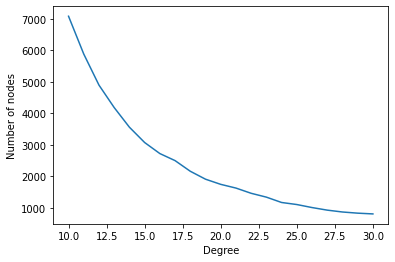

In [43]:
# Plotting number of nodes vs degree
plt.plot(a[9:30],b[9:30])
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

In [44]:
# Calculating betweenness centrality and eigen centrality
community_size = []
b_centrality = []
e_centrality = []
for size, community in sorted(m)[::-1][3:500]:
  G_comm = G.subgraph(community_social_analysis[community])
  b_centrality.append(sum(list(nx.algorithms.betweenness_centrality(G_comm).values()))/size)
  e_centrality.append(sum(list(nx.algorithms.eigenvector_centrality_numpy(G_comm).values()))/size)
  community_size.append(size)

Text(0, 0.5, 'average score')

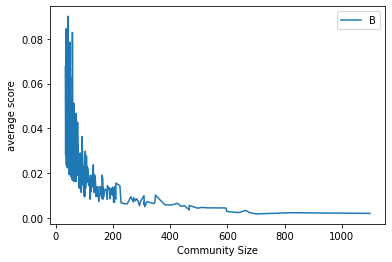

In [45]:
# Plotting betweenness centrality vs community size
new_x, new_y = zip(*sorted(zip(community_size, b_centrality)))
plt.plot(new_x, new_y)
plt.gca().legend('Betweenness centrality values')
plt.xlabel("Community Size")
plt.ylabel("average score")

Text(0, 0.5, 'average score')

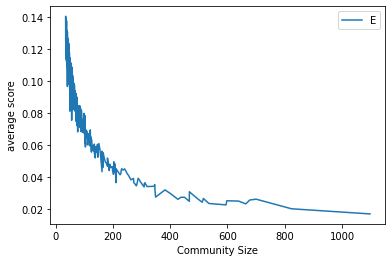

In [46]:
# Plotting eigen centrality vs community size
new_x, new_y = zip(*sorted(zip(community_size, e_centrality)))
plt.plot(new_x, new_y)
plt.gca().legend('Eigen centrality values')
plt.xlabel("Community Size")
plt.ylabel("average score")

In [47]:
# Calculating clustering coefficient of the whole graph
clustering_coeff = nx.algorithms.average_clustering(G)

In [48]:
clustering_coeff

0.1071834874944918

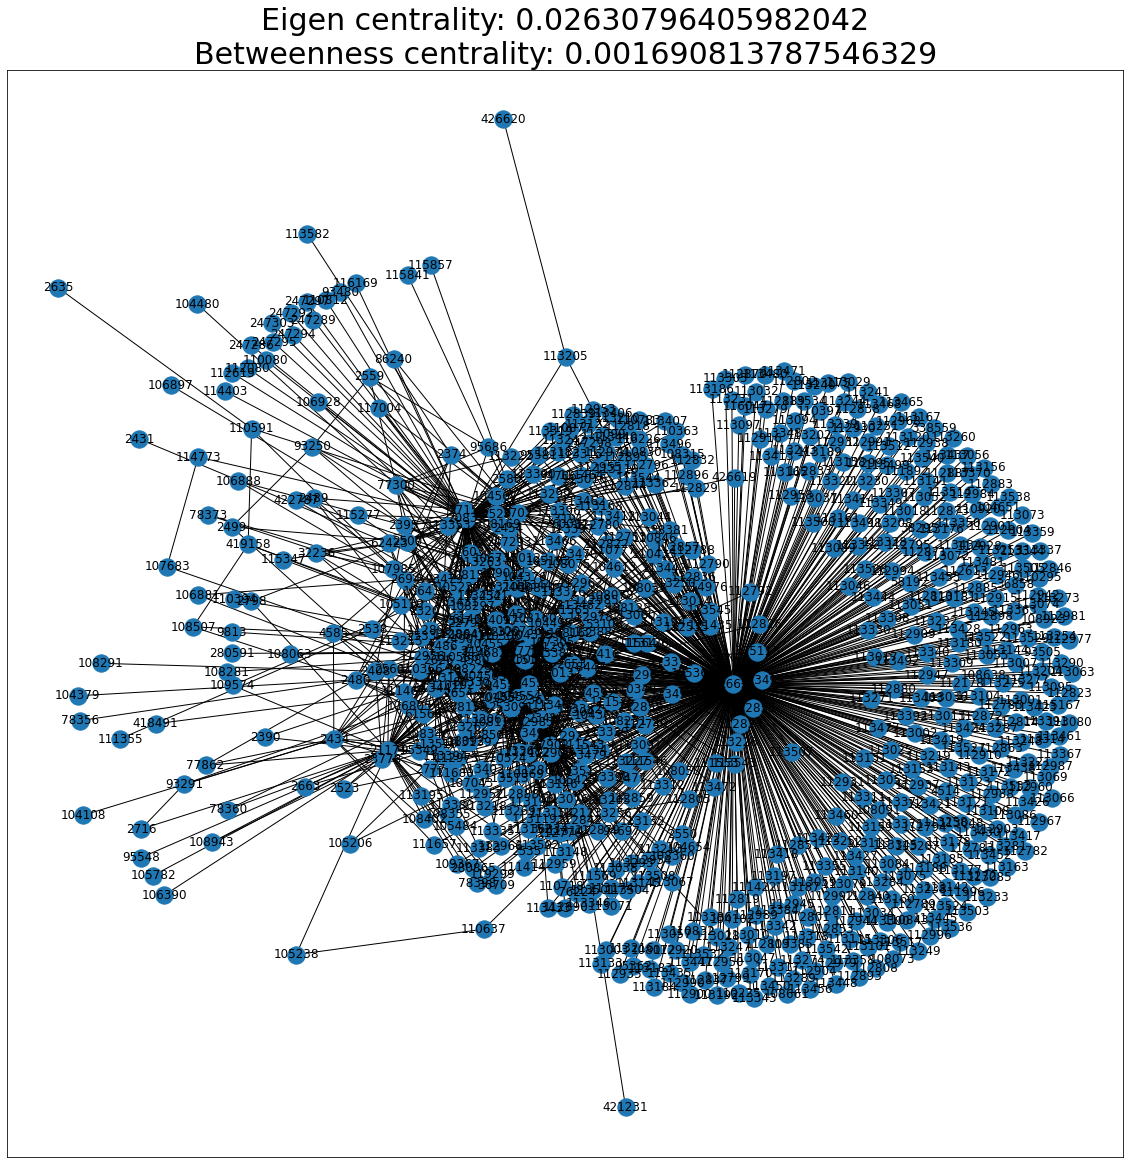

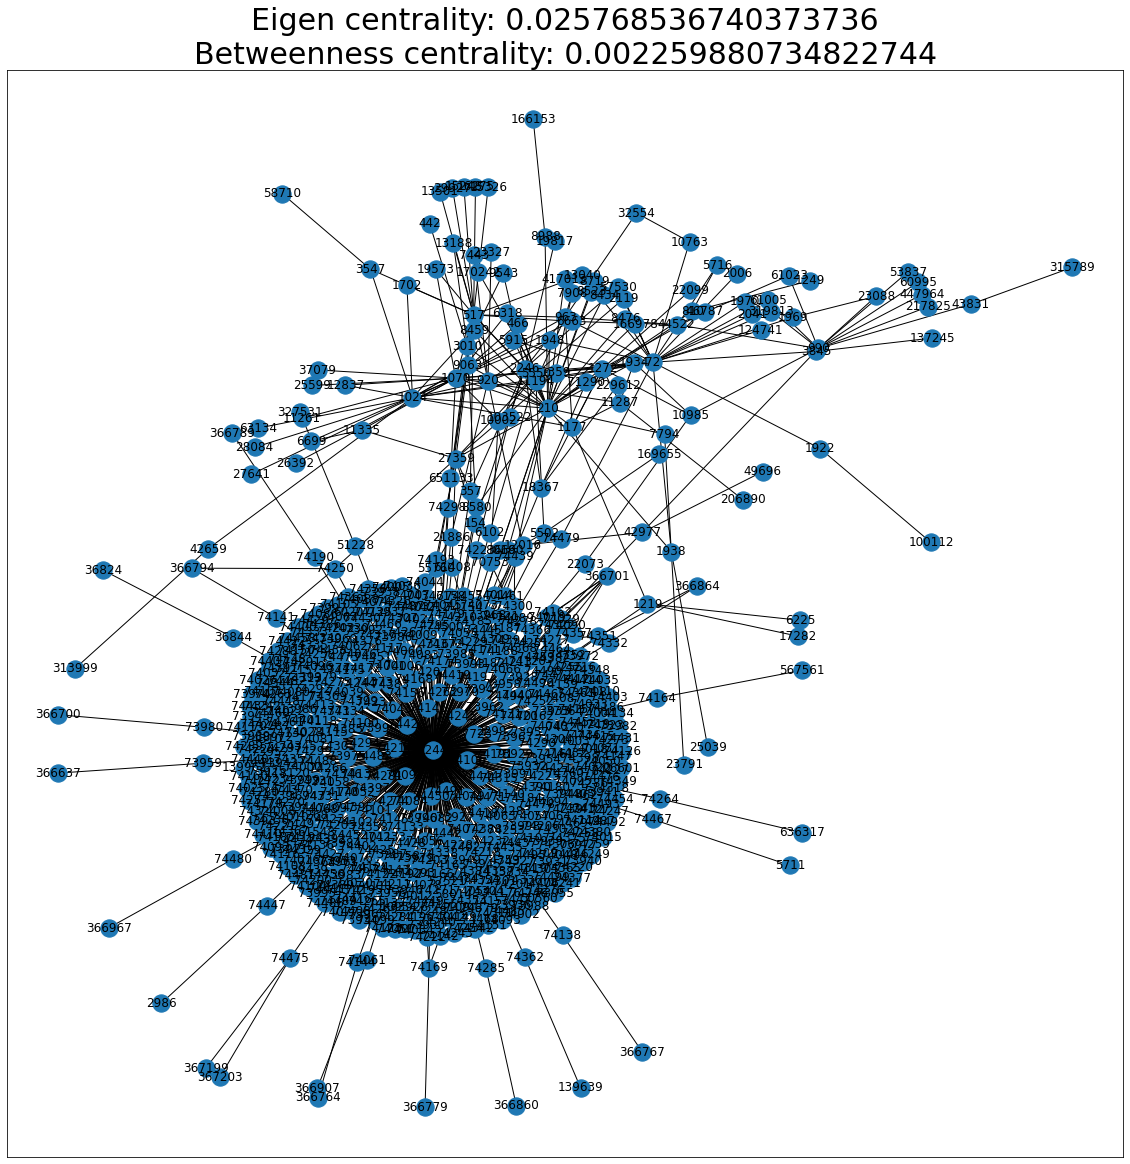

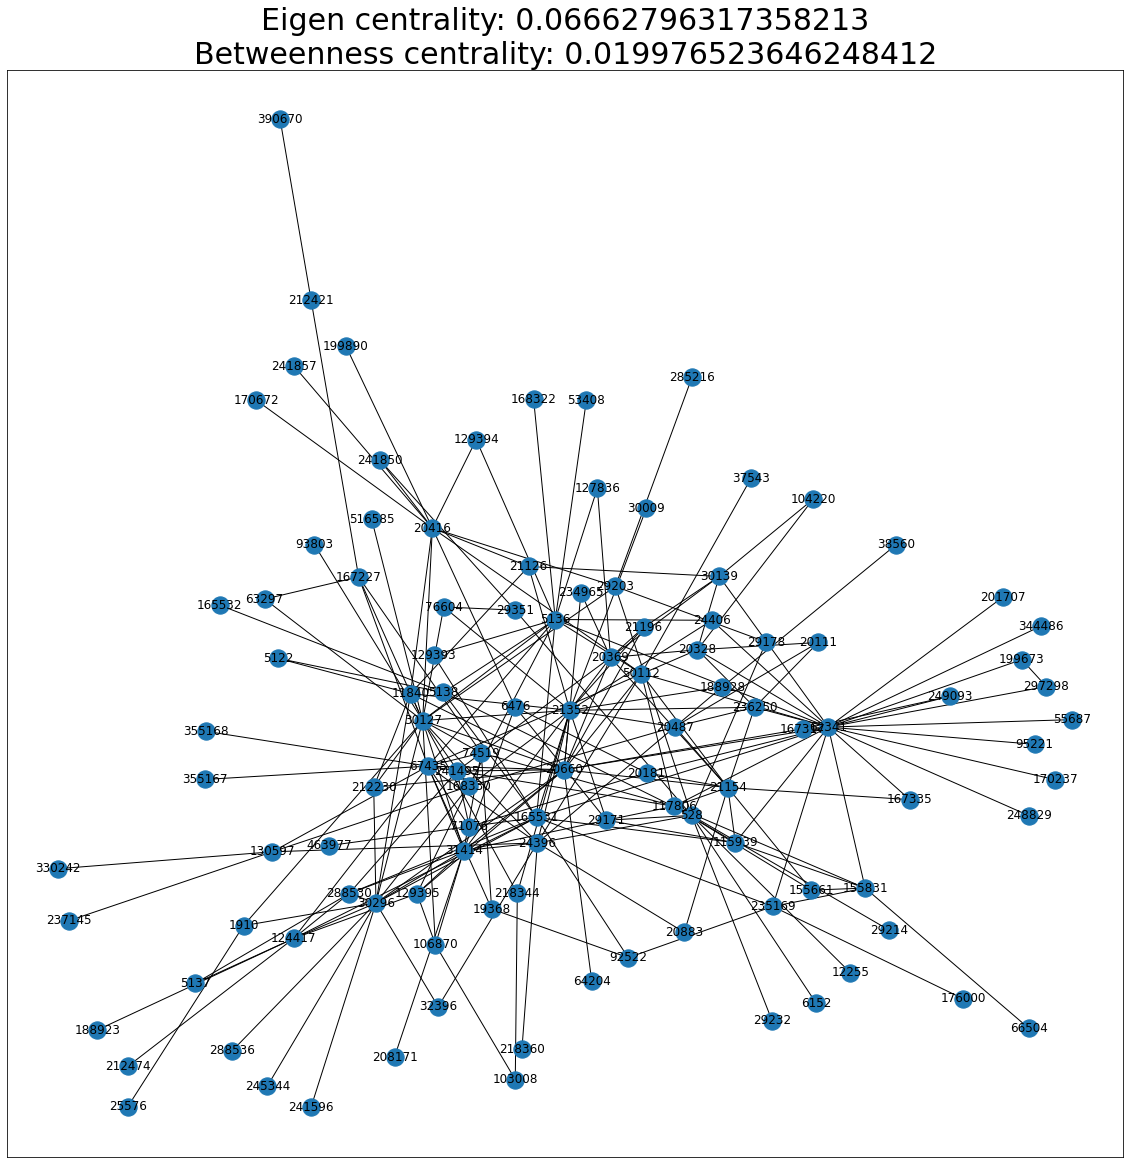

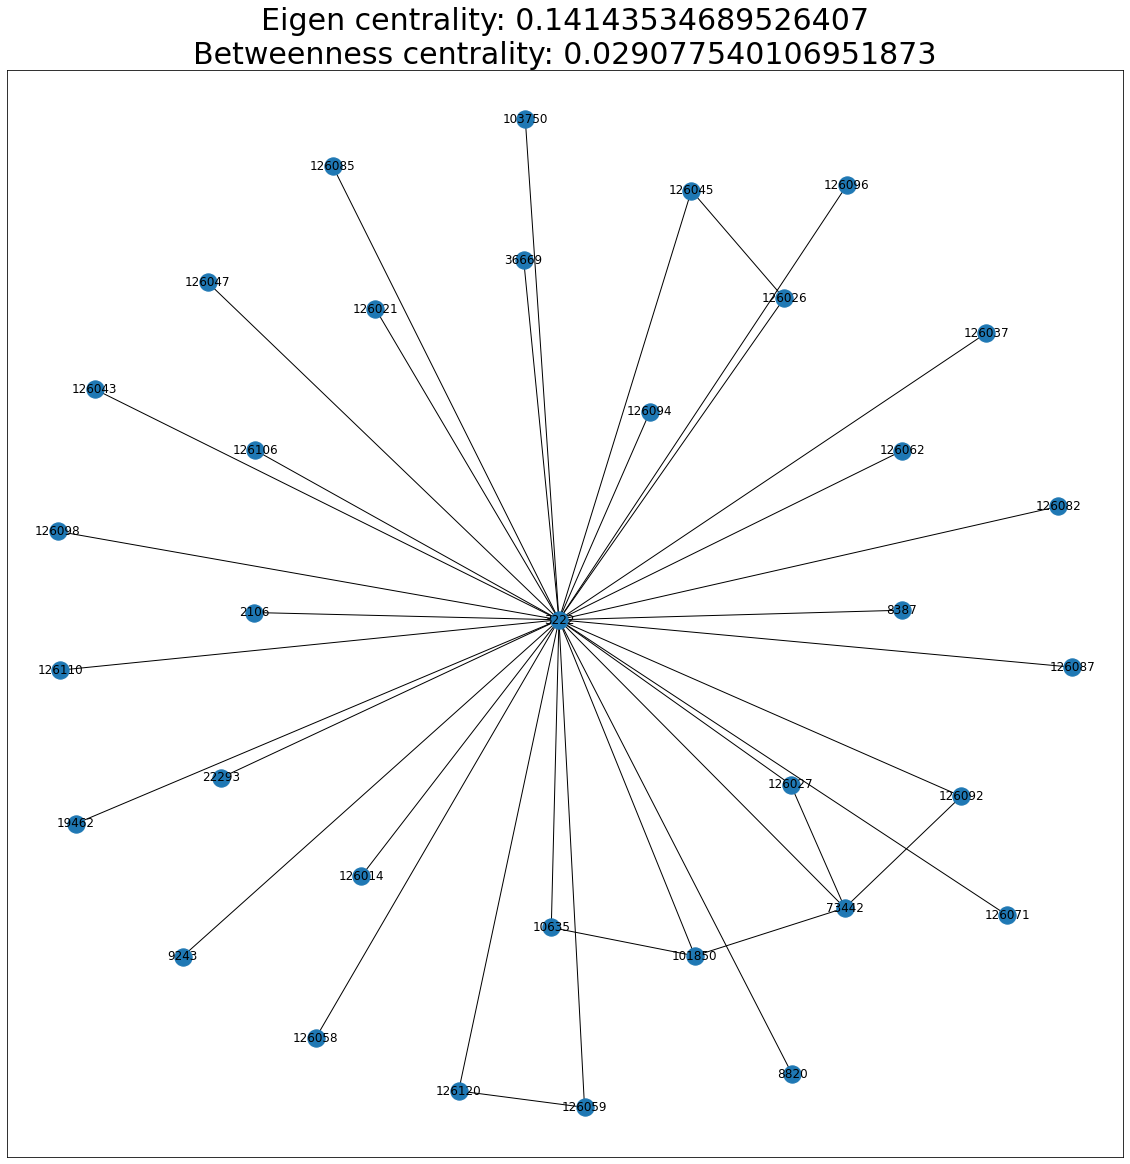

In [49]:
# Calculating centrality measures of and plotting subgraphs of G
evc_list =  []
bc_list = []
size = []
metric_keys = [5,6,116,515]
for i in metric_keys:
  plt.figure(figsize=(20,20))
  sub_graph = nx.Graph.subgraph(G, community_social_analysis[comms[i]])
  nx.draw_networkx(sub_graph)
  evc = sum(list(nx.algorithms.eigenvector_centrality_numpy(sub_graph).values()))/len(list(sub_graph.nodes()))
  bc = sum(list(nx.algorithms.betweenness_centrality(sub_graph).values()))/len(list(sub_graph.nodes()))
  # print(f"Graph {i} has an eigen vector centrality of {evc} and an average betweenness centrality of {bc}")
  evc_list.append(evc)
  bc_list.append(bc)
  size.append(len(list(sub_graph.nodes())))
  plt.title(str("Eigen centrality: " + str(evc) +  "\nBetweenness centrality: " + str(bc)), fontdict = {'fontsize' : 30})
  plt.show()
  plt.close()

Text(0, 0.5, 'average score')

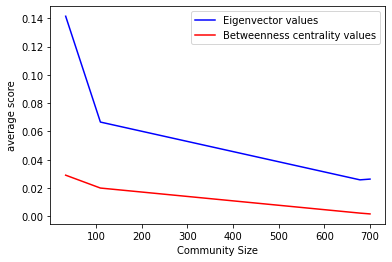

In [50]:
# Plot both betweenness and eigen centrality for the above subgraphs
plt.plot(size, evc_list, "-b")
plt.plot(size, bc_list, "-r")
plt.gca().legend(('Eigenvector values','Betweenness centrality values'))
plt.xlabel("Community Size")
plt.ylabel("average score")

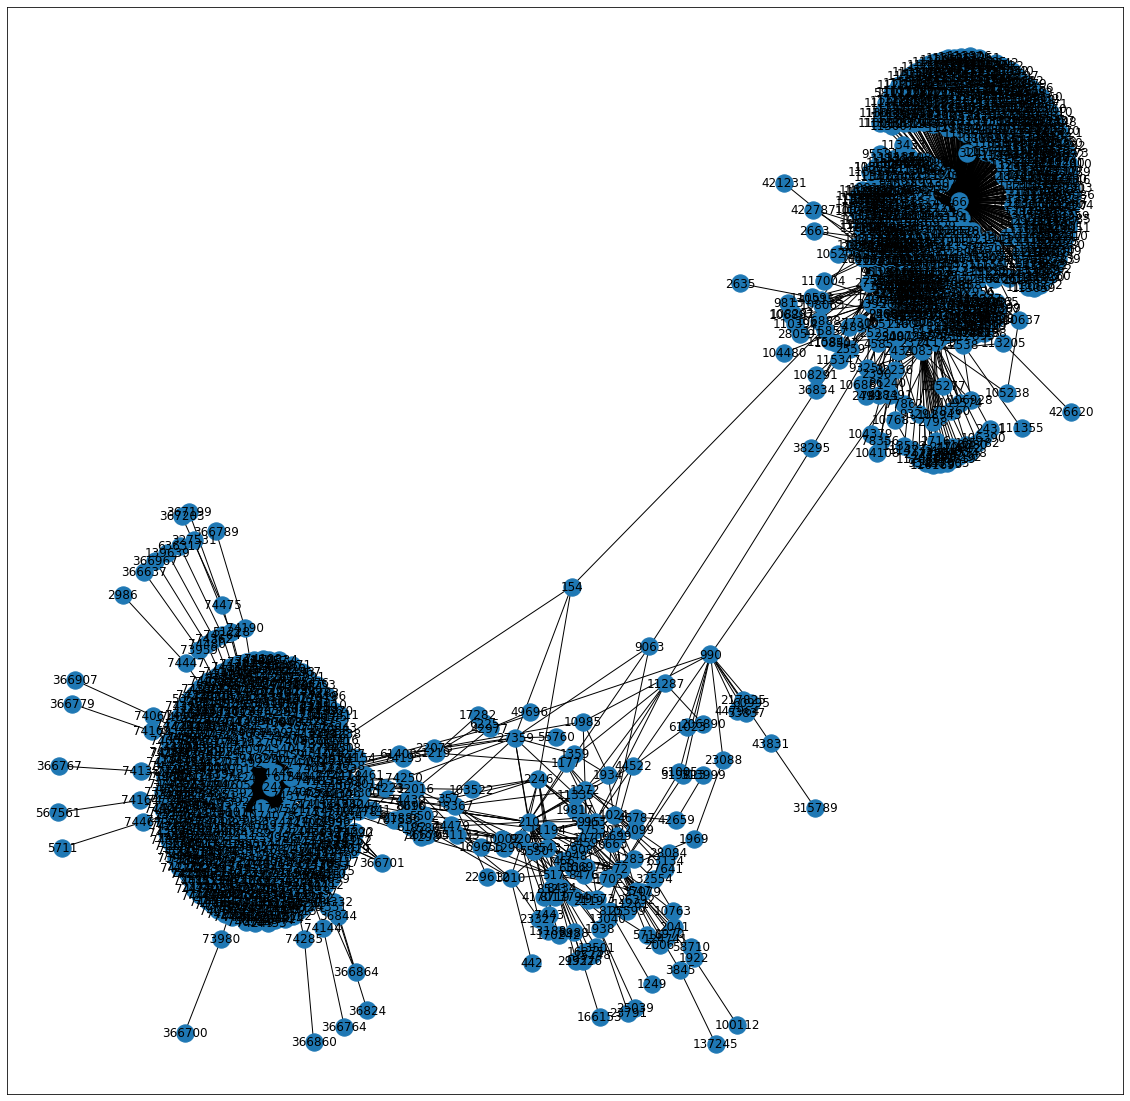

In [51]:
plt.figure(figsize=(20,20))
nx.draw_networkx(nx.Graph.subgraph(G, set(community_social_analysis[comms[5]] + community_social_analysis[comms[6]])))

In [ ]:
# Generating a subgraph with a relatively large community to determine the alpha value of a community
z = G.subgraph(community_social_analysis[27])

In [ ]:
# Calculating small world coefficient of subgraph
nx.algorithms.smallworld.omega(z)

0.6161798533657228